In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

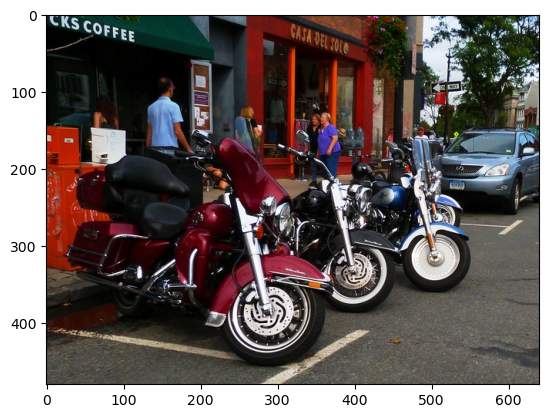

In [3]:
image = cv2.imread('./test_2.jpg')
plt.imshow(image[:,:,::-1])

In [4]:
model = cv2.dnn.readNetFromDarknet('./yolov3 (1).cfg', './yolov3.weights')
model

< cv2.dnn.Net 000001C1D4C93250>

In [5]:
classes=[]
k=open('./class_names')
for i in k.readlines():
    classes.append(i.strip())
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [6]:
blob = cv2.dnn.blobFromImage(image, 1/255, (320,320), True, crop=False)
blob

array([[[[0.3529412 , 0.21176472, 0.20784315, ..., 0.34117648,
          0.41960788, 0.3137255 ],
         [0.38431376, 0.20392159, 0.3803922 , ..., 0.6745098 ,
          0.76470596, 0.627451  ],
         [0.427451  , 0.18431373, 0.5254902 , ..., 0.9215687 ,
          0.7058824 , 0.5137255 ],
         ...,
         [0.30588236, 0.32156864, 0.29411766, ..., 0.3254902 ,
          0.3647059 , 0.28235295],
         [0.27450982, 0.28627452, 0.2392157 , ..., 0.3019608 ,
          0.33333334, 0.3647059 ],
         [0.2784314 , 0.27450982, 0.25882354, ..., 0.29411766,
          0.33333334, 0.36862746]],

        [[0.2627451 , 0.14901961, 0.1764706 , ..., 0.28235295,
          0.29803923, 0.21176472],
         [0.29803923, 0.14117648, 0.34901962, ..., 0.5686275 ,
          0.6509804 , 0.48235297],
         [0.3529412 , 0.12941177, 0.4901961 , ..., 0.8352942 ,
          0.6117647 , 0.3529412 ],
         ...,
         [0.3019608 , 0.32941177, 0.32156864, ..., 0.36078432,
          0.40000004, 0.3

In [7]:
blob.shape

(1, 3, 320, 320)

In [8]:
model.setInput(blob)

In [9]:
layers=model.getLayerNames()
layers

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [10]:
layers1=model.getUnconnectedOutLayers()
layers1

array([200, 227, 254])

In [11]:
layer2 = model.getUnconnectedOutLayersNames()
layer2

('yolo_82', 'yolo_94', 'yolo_106')

In [12]:
output = [layers[i-1] for i in layers1]
output

['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
output_layer_report =model.forward(output)
output_layer_report

(array([[0.0497086 , 0.04880117, 0.61323833, ..., 0.        , 0.        ,
         0.        ],
        [0.06014584, 0.0473879 , 0.38689962, ..., 0.        , 0.        ,
         0.        ],
        [0.06230298, 0.04968899, 1.0480363 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95322514, 0.9443471 , 0.6885418 , ..., 0.        , 0.        ,
         0.        ],
        [0.95232475, 0.95559376, 0.4129673 , ..., 0.        , 0.        ,
         0.        ],
        [0.95872813, 0.9493893 , 1.1397599 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.03067574, 0.03012833, 0.05933795, ..., 0.        , 0.        ,
         0.        ],
        [0.02938462, 0.02424055, 0.4153444 , ..., 0.        , 0.        ,
         0.        ],
        [0.02972566, 0.02328053, 0.09264766, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9686861 , 0.9725281 , 0.05483566, ..., 0.        , 0.        ,
         0.        

In [14]:
output_layer_report[0].shape

(300, 85)

In [15]:
output_layer_report[1].shape

(1200, 85)

In [16]:
output_layer_report[2].shape

(4800, 85)

-Above code for loading model step by step

-Entire logic in one cell

In [24]:

Threshold = 0.5
image_size = 320

b = []

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    count1 = 0
    count2 = 0
    k = []
    c = []
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person':
            count2+=1
            c.append(count2)
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes_names[ids[i]])+'-'+cnf
            cv2.rectangle(image , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
            cv2.putText(image,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
            

        
    if len(c) > 0:
        font = cv2.FONT_HERSHEY_PLAIN
        text1 = 'Total Persons : {}'.format(c[-1])
        cv2.putText(image , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
    else:
        c.append(0)
        font = cv2.FONT_HERSHEY_PLAIN
        text1 = 'Total Persons : {}'.format(c[-1])
        cv2.putText(image , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


image = cv2.imread('./test_1.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_wdith , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3 (1).cfg','./yolov3.weights')
classes_names = []
k = open('./class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
    

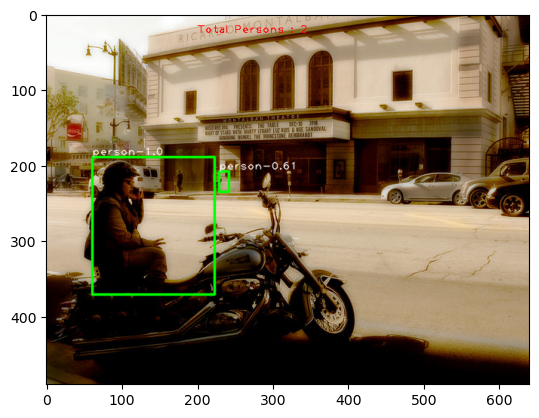

In [25]:
plt.imshow(image[:,:,::-1])

- Detections Pedestrains in Videos:

In [18]:


Threshold = 0.5
image_size = 320

total_persons_detected = []
total_cars_detected = []


def predictions(frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./testing images/yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
        classes_names = []
        k = open('./Files/class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frame' , frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

- showing results in Different window 

In [19]:


Threshold = 0.5
image_size = 320


def predictions(img , frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    total_persons_detected = []
    total_cars_detected = []
    
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(img , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        img = np.zeros([512,512,3] , dtype = 'uint8')
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3 (1).cfg','./yolov3.weights')
        classes_names = []
        k = open('./class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(img , frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frames',frame)
        cv2.imshow('report' , img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

persons =  6
persons =  3
persons =  4
persons =  4
persons =  4
persons =  4
persons =  4
persons =  4
persons =  4
persons =  5
persons =  7
persons =  6
persons =  6
persons =  5
persons =  6


# Information after NMS

In [20]:
final_box

array([ 2,  8,  3,  6, 16, 21, 19,  5])

In [21]:
cordinates

[[156, 33, 81, 242],
 [153, 29, 72, 296],
 [159, 26, 74, 300],
 [12, 61, 17, 85],
 [46, 65, 18, 90],
 [64, 68, 15, 76],
 [47, 68, 19, 91],
 [73, 42, 41, 164],
 [74, 43, 49, 160],
 [74, 51, 39, 155],
 [76, 51, 45, 156],
 [157, 48, 66, 245],
 [162, 45, 65, 254],
 [159, 59, 63, 243],
 [163, 41, 64, 277],
 [211, 195, 22, 83],
 [214, 196, 22, 83],
 [211, 204, 23, 80],
 [213, 203, 22, 81],
 [107, 68, 28, 35],
 [108, 77, 26, 26],
 [249, 82, 12, 47],
 [251, 83, 11, 47]]

In [22]:
confidence_score

[0.5042806,
 0.98868734,
 0.9994767,
 0.99338293,
 0.9892181,
 0.53879875,
 0.99113655,
 0.995916,
 0.9968438,
 0.9013458,
 0.9262647,
 0.8777965,
 0.9958177,
 0.7280541,
 0.99575347,
 0.7875195,
 0.8228397,
 0.7876252,
 0.8201147,
 0.5905527,
 0.5315471,
 0.7243042,
 0.5642813]

In [23]:
ids

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 2, 2, 0, 0]

# Saving each frame

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import os

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.3
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    if len(prediction_box) > 0:
        for k in prediction_box.flatten():
            x , y , w , h = bounding_box[k]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            conf_level = str(round(confidence[k] , 2))
            label = str(classes_names[class_labels[k]])
            cv2.rectangle(frame , (x,y),(x+w , y+h),(0,0,255),2)
            cv2.putText(frame ,label+' '+conf_level,(x,y-2),font,0.5,(255,0,0,),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .3)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels




count = 0
image = cv2.VideoCapture('./yolo_test.mp4')
while image.read():
    res , frame = image.read()
    if res == True:
        original_with , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov3 (1).cfg','./yolov3.weights')
        classes_names = []
        k = open('./class_names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
        #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
        #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
        #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
        #print(outputs)
        output_data = Neural_Network.forward(outputs)
        prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

        final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )
        cv2.imwrite('./Frame_3/%d.jpg'%count,frame)
        cv2.imshow('YOLO Algorithm', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        count+=1
    else:
        break 

image.release()
cv2.destroyAllWindows()


In [27]:
#Joining All the frames and making as a video

In [28]:
c=[]
for i in os.listdir('./Frame_3/'):
    c.append(i)
print(c)

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '180.jpg', 

In [29]:
#sorting all frames

In [30]:
import re
c.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
c

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [36]:
img_array = []
for frame in c:
    img = cv2.imread('./Frame_3/'+str(frame))
    height, width, layers = img.shape
    size = (width , height)
    img_array.append(img)
out = cv2.VideoWriter('./Result video/output_3.mp4',cv2.VideoWriter_fourcc(*'XVID'),30.0,size)
for l in range(len(img_array)):
    out.write(img_array[l])
out.release()